In [1]:
from mxnet import nd
from mxnet import gluon
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt

In [61]:
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image

# Load model

In [26]:
net = models.resnet50_v2(pretrained=True)

# Load images

In [96]:
fnames = [
    "/home/fberes/FBDATA/DATA/recipenet/imagenet_pics/pics/banan/banan_1_0",
    #"/home/fberes/FBDATA/DATA/recipenet/imagenet_pics/pics/banan/banan_1_2",
    #"/home/fberes/FBDATA/DATA/recipenet/imagenet_pics/pics/banan/banan_1_27",
    "/home/fberes/FBDATA/DATA/recipenet/imagenet_pics/pics/sor/sor_1_126",
    "/home/fberes/FBDATA/DATA/recipenet/imagenet_pics/pics/repa/repa_1_68",
    #"/home/fberes/FBDATA/DATA/recipenet/imagenet_pics/pics/margarin/margarin_1_391",
    "/home/fberes/FBDATA/DATA/recipenet/imagenet_pics/pics/paprika/paprika_1_184",
]

In [97]:
def load_image(fname, show=True):
    x = image.imread(fname)
    #if show:
    #    plt.figure()
    #    plt.imshow(x.asnumpy())
    x = image.resize_short(x, 256)
    x, _ = image.center_crop(x, (224,224))
    if show:
        plt.figure()
        plt.imshow(x.asnumpy())
    return x

In [98]:
data = [load_image(f, show=False) for f in fnames]

# Other image manipulations

In [99]:
def img_apply(img, aug, N=5):
    Y = [aug(img) for _ in range(N)]
    for pic in Y:
        plt.figure()
        plt.imshow(pic.asnumpy())

In [100]:
pic = data[1]

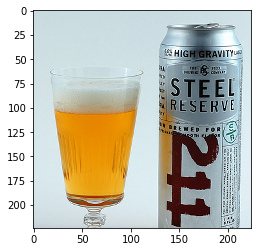

In [101]:
plt.imshow(pic.asnumpy())

img_apply(pic, gluon.data.vision.transforms.RandomFlipLeftRight())

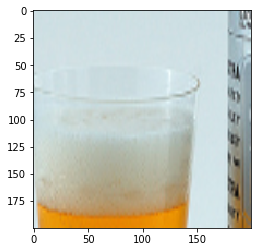

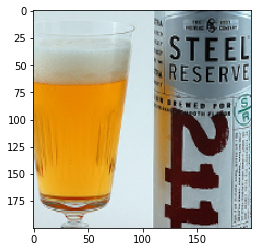

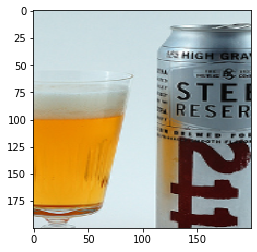

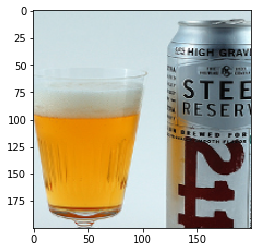

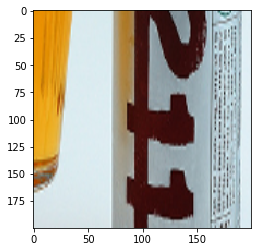

In [102]:
shape_aug = gluon.data.vision.transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
img_apply(pic, shape_aug)

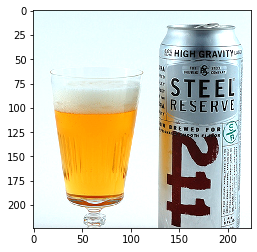

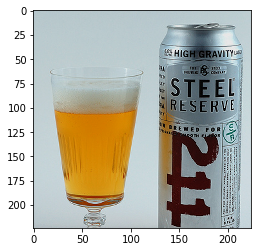

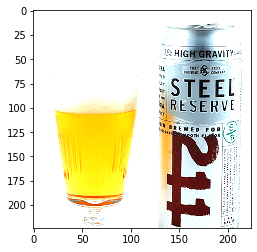

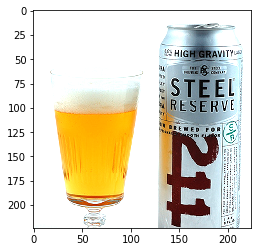

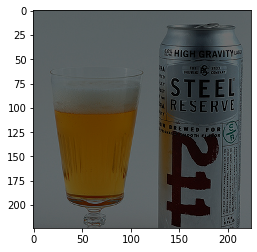

In [103]:
img_apply(pic, gluon.data.vision.transforms.RandomBrightness(0.7))

# Transform and predict

In [104]:
def transform(data):
    data = data.transpose((2,0,1)).expand_dims(axis=0)
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
    rgb_std = nd.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
    return (data.astype('float32') / 255 - rgb_mean) / rgb_std

In [105]:
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

In [106]:
len(text_labels)

1000

net

prob.topk(k=5)[0]

With prob = 0.99812, it contains banana
With prob = 0.00057, it contains pineapple, ananas
With prob = 0.00028, it contains spaghetti squash
With prob = 0.00022, it contains grocery store, grocery, food market, market
With prob = 0.00020, it contains orange

With prob = 0.92348, it contains beer glass
With prob = 0.05688, it contains beer bottle
With prob = 0.00682, it contains pop bottle, soda bottle
With prob = 0.00265, it contains cocktail shaker
With prob = 0.00165, it contains goblet

With prob = 0.12619, it contains Crock Pot
With prob = 0.07144, it contains chocolate sauce, chocolate syrup
With prob = 0.06317, it contains drum, membranophone, tympan
With prob = 0.05401, it contains teapot
With prob = 0.04848, it contains frying pan, frypan, skillet

With prob = 0.99990, it contains bell pepper
With prob = 0.00006, it contains cucumber, cuke
With prob = 0.00001, it contains acorn squash
With prob = 0.00001, it contains zucchini, courgette
With prob = 0.00000, it contains grocery 

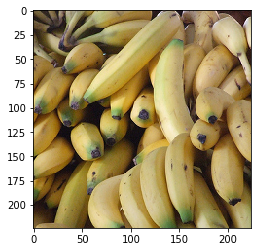

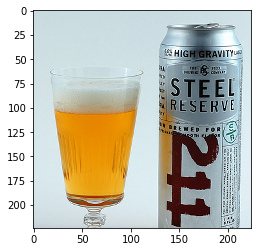

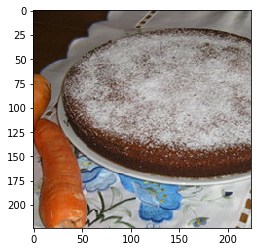

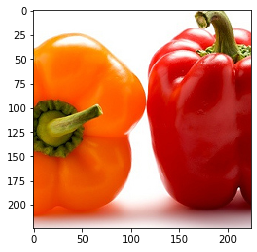

In [107]:
for x in data:
    plt.figure()
    plt.imshow(x.asnumpy())
    prob = net(transform(x)).softmax()
    idx = prob.topk(k=5)[0]
    for i in idx:
        i = int(i.asscalar())
        print('With prob = %.5f, it contains %s' % (
            prob[0,i].asscalar(), text_labels[i]))
    print()